In [2]:
import csv
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import math
import scipy.stats as stats

In [3]:
# 글씨 깨짐 방지
from matplotlib import rc  
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False 

In [4]:
# 빅쿼리에 접근

from google.oauth2 import service_account

credentials = service_account.Credentials.from_service_account_file("./data/burnished-core-313703-da23d34dff29.json")

In [5]:
from google.cloud import bigquery

client = bigquery.Client(
    credentials = credentials,
    project = credentials.project_id
)

## EDA

In [5]:
# 점포 데이터 결측치
sql = """
SELECT
  *
FROM
  `burnished-core-313703.restaurant_consumption.store`
WHERE
  (service_nm LIKE "%점"
    OR service_nm LIKE "커피%")
  AND service_nm NOT IN("편의점",
    "철물점",
    "%한복%",
    "%생활%")
"""
store = client.query(sql).to_dataframe()
store

,year_quater_cd,autono_cd,autono_nm,service_cd,service_nm,store_cnt,similar_store_cnt,open_rat,open_store_cnt,close_rat,close_store_cnt,franchise_cnt
0,20191,11530,구로구,CS100001,한식음식점,1918,2197,3,57,3,66,279
1,20192,11530,구로구,CS100001,한식음식점,1924,2203,4,87,4,81,279
2,20193,11530,구로구,CS100001,한식음식점,1930,2209,5,106,5,100,279
3,20194,11530,구로구,CS100001,한식음식점,1921,2191,4,81,5,99,270
4,20201,11530,구로구,CS100001,한식음식점,1913,2174,4,76,4,93,261
...,...,...,...,...,...,...,...,...,...,...,...,...
5395,20222,11260,중랑구,CS300040,재생용품 판매점,54,54,0,0,0,0,0
5396,20223,11260,중랑구,CS300040,재생용품 판매점,54,54,0,0,0,0,0
5397,20224,11260,중랑구,CS300040,재생용품 판매점,54,54,0,0,0,0,0
5398,20231,11260,중랑구,CS300040,재생용품 판매점,54,54,0,0,0,0,0


In [6]:
store.isnull().sum()

year_quater_cd       0
autono_cd            0
autono_nm            0
service_cd           0
service_nm           0
store_cnt            0
similar_store_cnt    0
open_rat             0
open_store_cnt       0
close_rat            0
close_store_cnt      0
franchise_cnt        0
dtype: int64

In [7]:
# 유동인구 데이터 결측치
sql = """
SELECT
  *
FROM
  `burnished-core-313703.restaurant_consumption.pop_by_road`
"""
population = client.query(sql).to_dataframe()
population

,year_quater_cd,autono_cd,autono_nm,total_floating_pop,male_floating_pop,female_floating_pop,gen10_floating_pop,gen20_floating_pop,gen30_floating_pop,gen40_floating_pop,gen50_floating_pop,gen60_floating_pop,Mon_floating_pop,Tue_floating_pop,Wed_floating_pop,Thur_floating_pop,Fri_floating_pop,Sat_floating_pop,Sun_floating_pop
0,20191,11530,구로구,82988135,40034627,42953506,11717510,10642666,13582449,13609430,12851678,20584401,11810367,11793117,11792188,11745449,11726961,11870170,12249882
1,20192,11530,구로구,53082242,25570595,27511647,7606759,6775140,8754910,8806601,8198539,12940292,7578208,7516010,7567586,7577843,7527947,7517855,7796794
2,20193,11530,구로구,80086633,38641930,41444702,11398764,10538021,13306555,13340671,12295472,19207150,11484510,11422640,11450535,11384586,11304521,11328978,11710866
3,20194,11530,구로구,80971383,39186657,41784727,11710745,10534918,13416877,13513749,12377063,19418033,11586360,11501215,11514290,11467837,11394332,11542518,11964831
4,20201,11530,구로구,82487700,39853308,42634392,12036970,10838367,13658875,13708256,12597610,19647622,11775972,11723781,11730465,11697975,11660509,11791921,12107077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,20222,11260,중랑구,100756172,47046034,53710137,13873761,13379137,15472029,15088412,16825842,26116990,14356637,14173529,14177909,14152727,14119711,14668097,15107563
446,20223,11260,중랑구,98199862,45994878,52204985,13482431,13026972,15123372,14699357,16452038,25415692,14033209,13853494,13807156,13772609,13795830,14302432,14635131
447,20224,11260,중랑구,97958502,45931643,52026859,13602382,12917254,15158415,14673901,16365195,25241353,14003026,13751597,13752257,13706952,13745772,14314352,14684545
448,20232,11260,중랑구,96598350,45256354,51341996,13385097,12845344,15092265,14495368,16048721,24731556,13753023,13621238,13524064,13515542,13591145,14133548,14459789


In [8]:
population.isnull().sum()

year_quater_cd         0
autono_cd              0
autono_nm              0
total_floating_pop     0
male_floating_pop      0
female_floating_pop    0
gen10_floating_pop     0
gen20_floating_pop     0
gen30_floating_pop     0
gen40_floating_pop     0
gen50_floating_pop     0
gen60_floating_pop     0
Mon_floating_pop       0
Tue_floating_pop       0
Wed_floating_pop       0
Thur_floating_pop      0
Fri_floating_pop       0
Sat_floating_pop       0
Sun_floating_pop       0
dtype: int64

In [9]:
# 소득/소비 데이터 결측치
sql = """
SELECT
  *
FROM
  `burnished-core-313703.restaurant_consumption.income_expense`
"""
income = client.query(sql).to_dataframe()
income

,year_quater_cd,autono_cd,autono_nm,month_avg_incom,income_cd,total_expense,grocery_total_expense,closho_total_expense,dailynec_total_expense,medicla_total_expense,trans_total_expense,edu_total_expense,entertain_total_expense,leisure_total_expense,etc_total_expense,food_total_expense
0,20231,11545,금천구,2632285,6,72381528000,16391004000,15296799000,1227870000,8525016000,3703454000,1510718000,1876521000,8290313000,2043012000,13516821000
1,20191,11545,금천구,2760087,6,118236694000,11047828000,20155833000,57883048000,6075426000,2759146000,1551588000,1872844000,4312535000,1575074000,11003372000
2,20192,11545,금천구,2760087,6,121225950000,12022226000,20497473000,57164479000,6726441000,3181799000,1425613000,2035507000,4888490000,1702004000,11581918000
3,20193,11545,금천구,2760087,6,104592838000,13011898000,17575418000,41464092000,6948247000,3425845000,1573793000,2042689000,4799541000,1703073000,12048242000
4,20194,11545,금천구,2632285,6,110127925000,11917185000,25105613000,37912934000,8963931000,3325026000,1730333000,1979339000,4962691000,1872424000,12358449000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,20221,11680,강남구,4943841,9,2336292738000,36917710000,25205260000,9928580000,151787801000,26501903000,28622019000,6613096000,1107184900000,878211630000,65319839000
446,20222,11680,강남구,4943841,9,2514232842000,41023896000,37236809000,10412783000,137717096000,31679223000,31206345000,12253585000,1218535191000,906533025000,87634889000
447,20223,11680,강남구,4943841,9,2667613821000,42323846000,34635475000,9470704000,133218984000,32395654000,41253858000,12193111000,1331330887000,942702525000,88088777000
448,20224,11680,강남구,4943841,9,2682596068000,43032309000,35642400000,9200405000,134393742000,32966794000,34699891000,11957574000,1361139144000,928074251000,91489558000


In [10]:
income.isnull().sum()

year_quater_cd             0
autono_cd                  0
autono_nm                  0
month_avg_incom            0
income_cd                  0
total_expense              0
grocery_total_expense      0
closho_total_expense       0
dailynec_total_expense     0
medicla_total_expense      0
trans_total_expense        0
edu_total_expense          0
entertain_total_expense    0
leisure_total_expense      0
etc_total_expense          0
food_total_expense         0
dtype: int64

In [11]:
# 매출 데이터 결측치
sql = """
SELECT
  *
FROM
  `burnished-core-313703.restaurant_consumption.sales`
WHERE
  (service_nm LIKE "%점" OR service_nm LIKE "커피%")
  AND service_nm NOT IN("편의점", "철물점", "%한복%", "%생활%")
"""
sales = client.query(sql).to_dataframe()
sales

,year_quater_cd,autono_cd,autono_nm,service_cd,service_nm,month_sales_amount,month_sales_cnt,week_sales_amount,weekend_sales_amount,Mon_sales_amount,...,hour_17to21_sales_amount,hour_21to24_sales_amount,male_sales_amount,female_sales_amount,gen10_sales_amount,gen20_sales_amount,gen30_sales_amount,gen40_sales_amount,gen50_sales_amount,gen60_sales_amount
0,20222,11530,구로구,CS100001,한식음식점,104531607021,3331283,77131794330,27399812691,13545706402,...,42000916715,20729219316,57527300829,31411005499,337345198,13777006838,21554265684,19509262328,19590440669,14169945729
1,20201,11530,구로구,CS100001,한식음식점,68388840155,2412299,51367395035,17021445120,9174194674,...,27154359129,14552087184,38454474948,20698104197,293036214,10484150204,14588996123,13874923914,12526498336,7385078737
2,20211,11530,구로구,CS100001,한식음식점,62439653156,2296533,46988701328,15450951828,8625964214,...,29512996563,7662735367,35255393355,17923161497,230015064,8262869030,12162561060,12182305914,12359192329,7981611434
3,20214,11530,구로구,CS100001,한식음식점,89207697679,3114643,67080400302,22127297377,11425796616,...,38493764431,14153956617,49456674702,26047159964,368707727,13392434888,17269023270,16736748169,16493236030,11243793362
4,20213,11530,구로구,CS100001,한식음식점,67365563819,2674922,50455444457,16910119362,8889125980,...,28822979735,7646048254,38058299311,20331100662,238873176,9514622081,12592719205,13254017139,13404031175,9385259290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,20212,11260,중랑구,CS100010,커피-음료,5158029307,872229,3415113864,1742915443,635912025,...,1368685129,259288230,2225292898,2813765062,134314832,1487025275,1327468887,1011730598,762605744,315912610
4496,20232,11260,중랑구,CS100010,커피-음료,7370667792,1258332,4909473599,2461194193,979925313,...,1861771473,513838763,3214657824,4056707816,179028043,1633080383,1941893251,1441248457,1332822249,743293270
4497,20231,11260,중랑구,CS100010,커피-음료,6352978826,1051167,4259780227,2093198599,796351170,...,1630911093,443138696,2787714387,3460638998,124638040,1429399002,1707699312,1241566158,1102150699,642900165
4498,20192,11260,중랑구,CS100010,커피-음료,4861094297,729647,3158592043,1702502254,589901193,...,1407461183,631773943,2047614403,2748596013,132000290,1605610864,1248197919,913335636,658329223,238736491


In [12]:
sales.isnull().sum()

year_quater_cd              0
autono_cd                   0
autono_nm                   0
service_cd                  0
service_nm                  0
month_sales_amount          0
month_sales_cnt             0
week_sales_amount           0
weekend_sales_amount        0
Mon_sales_amount            0
Tue_sales_amount            0
Wed_sales_amount            0
Thur_sales_amount           0
Fri_sales_amount            0
Sat_sales_amount            0
Sun_sales_amount            0
hour_00to06_sales_amount    0
hour_06to11_sales_amount    0
hour_11to14_sales_amount    0
hour_14to17_sales_amount    0
hour_17to21_sales_amount    0
hour_21to24_sales_amount    0
male_sales_amount           0
female_sales_amount         0
gen10_sales_amount          0
gen20_sales_amount          0
gen30_sales_amount          0
gen40_sales_amount          0
gen50_sales_amount          0
gen60_sales_amount          0
dtype: int64

### 총 매출

In [129]:
sql = """
SELECT
  *
FROM
  `burnished-core-313703.restaurant_consumption.sales`
WHERE
  year_quater_cd BETWEEN 20191 AND 20224
ORDER BY
  year_quater_cd
"""
sales = client.query(sql).to_dataframe()
sales

,year_quater_cd,autono_cd,autono_nm,service_cd,service_nm,month_sales_amount,month_sales_cnt,week_sales_amount,weekend_sales_amount,Mon_sales_amount,...,hour_17to21_sales_amount,hour_21to24_sales_amount,male_sales_amount,female_sales_amount,gen10_sales_amount,gen20_sales_amount,gen30_sales_amount,gen40_sales_amount,gen50_sales_amount,gen60_sales_amount
0,20191,11530,구로구,CS100001,한식음식점,70171518518,2415589,51063751452,19107767066,8675046596,...,28330474940,15146079838,38391952585,22095528575,306874161,9850005758,15098448052,14751243002,12663229776,7817392746
1,20191,11530,구로구,CS100002,중식음식점,6957136169,224054,4580501623,2376634546,770287003,...,2778602145,1122232715,3871211168,2301648166,19129493,1026839116,1795843668,1635948919,1203386721,491711408
2,20191,11530,구로구,CS100003,일식음식점,4924330384,180847,3550801542,1373528842,567287507,...,1753069974,1360267966,2777985844,1497418263,24557526,1062306951,1347696803,964283353,568829410,307730061
3,20191,11530,구로구,CS100004,양식음식점,2442791619,91148,1754878662,687912957,252443232,...,842445209,229479519,1059367107,1051900318,7063272,459241009,760721901,560709767,243262684,80268794
4,20191,11530,구로구,CS100005,제과점,4901534021,535308,3498467116,1403066905,605834302,...,1616183955,527646385,1860920752,2628216489,33210733,717014795,1262821374,1275529788,781670627,418889919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24268,20224,11260,중랑구,CS300032,가전제품,3642092153,11261,2418807953,1223284200,764749779,...,1011940657,868999,1271816173,1999418149,0,412272647,266091767,594129717,1153796146,844944046
24269,20224,11260,중랑구,CS300033,철물점,1185418967,48352,995164764,190254203,244421189,...,157984817,0,580133643,216688366,42722,123214041,58046510,131381804,226319585,257817348
24270,20224,11260,중랑구,CS300035,인테리어,632396791,10479,514913991,117482800,149269176,...,78542062,0,413737716,119397032,0,122831375,9481538,40922814,169389717,190509303
24271,20224,11260,중랑구,CS300036,조명용품,717915630,21174,680816725,37098905,179417948,...,85969361,0,435597024,167618374,0,19405321,27820056,81468634,245115446,229405940


[Text(0, 0, '20191'),
 Text(1, 0, '20192'),
 Text(2, 0, '20193'),
 Text(3, 0, '20194'),
 Text(4, 0, '20201'),
 Text(5, 0, '20202'),
 Text(6, 0, '20203'),
 Text(7, 0, '20204'),
 Text(8, 0, '20211'),
 Text(9, 0, '20212'),
 Text(10, 0, '20213'),
 Text(11, 0, '20214'),
 Text(12, 0, '20221'),
 Text(13, 0, '20222'),
 Text(14, 0, '20223'),
 Text(15, 0, '20224')]

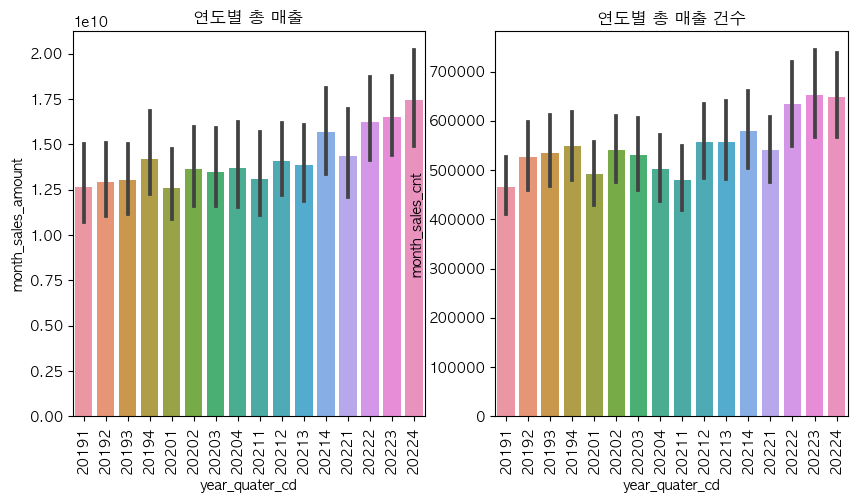

In [33]:
fig, ax = plt.subplots(ncols=2, nrows=1,  figsize=(10,5))

# 총 매출
sns.barplot(
    data = sales,
    x = "year_quater_cd",
    y = "month_sales_amount",
    ax = ax[0]
).set(
    title = "연도별 총 매출"
)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
# 총 매출 건수
plt.xticks(rotation=90)
sns.barplot(
    data = sales,
    x = "year_quater_cd",
    y = "month_sales_cnt",
    ax = ax[1]
).set(
    title = "연도별 총 매출 건수"
)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)

In [132]:
sales = sales.drop(sales.iloc[:, 9:22], axis=1)

In [133]:
sales = sales.drop(["year_quater_cd"], axis=1)
sales = sales.drop(["autono_cd"], axis=1)
sales = sales.drop(["autono_nm"], axis=1)
sales = sales.drop(["service_cd"], axis=1)
sales = sales.drop(["service_nm"], axis=1)

In [134]:
sales

,month_sales_amount,month_sales_cnt,week_sales_amount,weekend_sales_amount,male_sales_amount,female_sales_amount,gen10_sales_amount,gen20_sales_amount,gen30_sales_amount,gen40_sales_amount,gen50_sales_amount,gen60_sales_amount
0,70171518518,2415589,51063751452,19107767066,38391952585,22095528575,306874161,9850005758,15098448052,14751243002,12663229776,7817392746
1,6957136169,224054,4580501623,2376634546,3871211168,2301648166,19129493,1026839116,1795843668,1635948919,1203386721,491711408
2,4924330384,180847,3550801542,1373528842,2777985844,1497418263,24557526,1062306951,1347696803,964283353,568829410,307730061
3,2442791619,91148,1754878662,687912957,1059367107,1051900318,7063272,459241009,760721901,560709767,243262684,80268794
4,4901534021,535308,3498467116,1403066905,1860920752,2628216489,33210733,717014795,1262821374,1275529788,781670627,418889919
...,...,...,...,...,...,...,...,...,...,...,...,...
24268,3642092153,11261,2418807953,1223284200,1271816173,1999418149,0,412272647,266091767,594129717,1153796146,844944046
24269,1185418967,48352,995164764,190254203,580133643,216688366,42722,123214041,58046510,131381804,226319585,257817348
24270,632396791,10479,514913991,117482800,413737716,119397032,0,122831375,9481538,40922814,169389717,190509303
24271,717915630,21174,680816725,37098905,435597024,167618374,0,19405321,27820056,81468634,245115446,229405940


[Text(0.5, 1.0, '총 매출')]

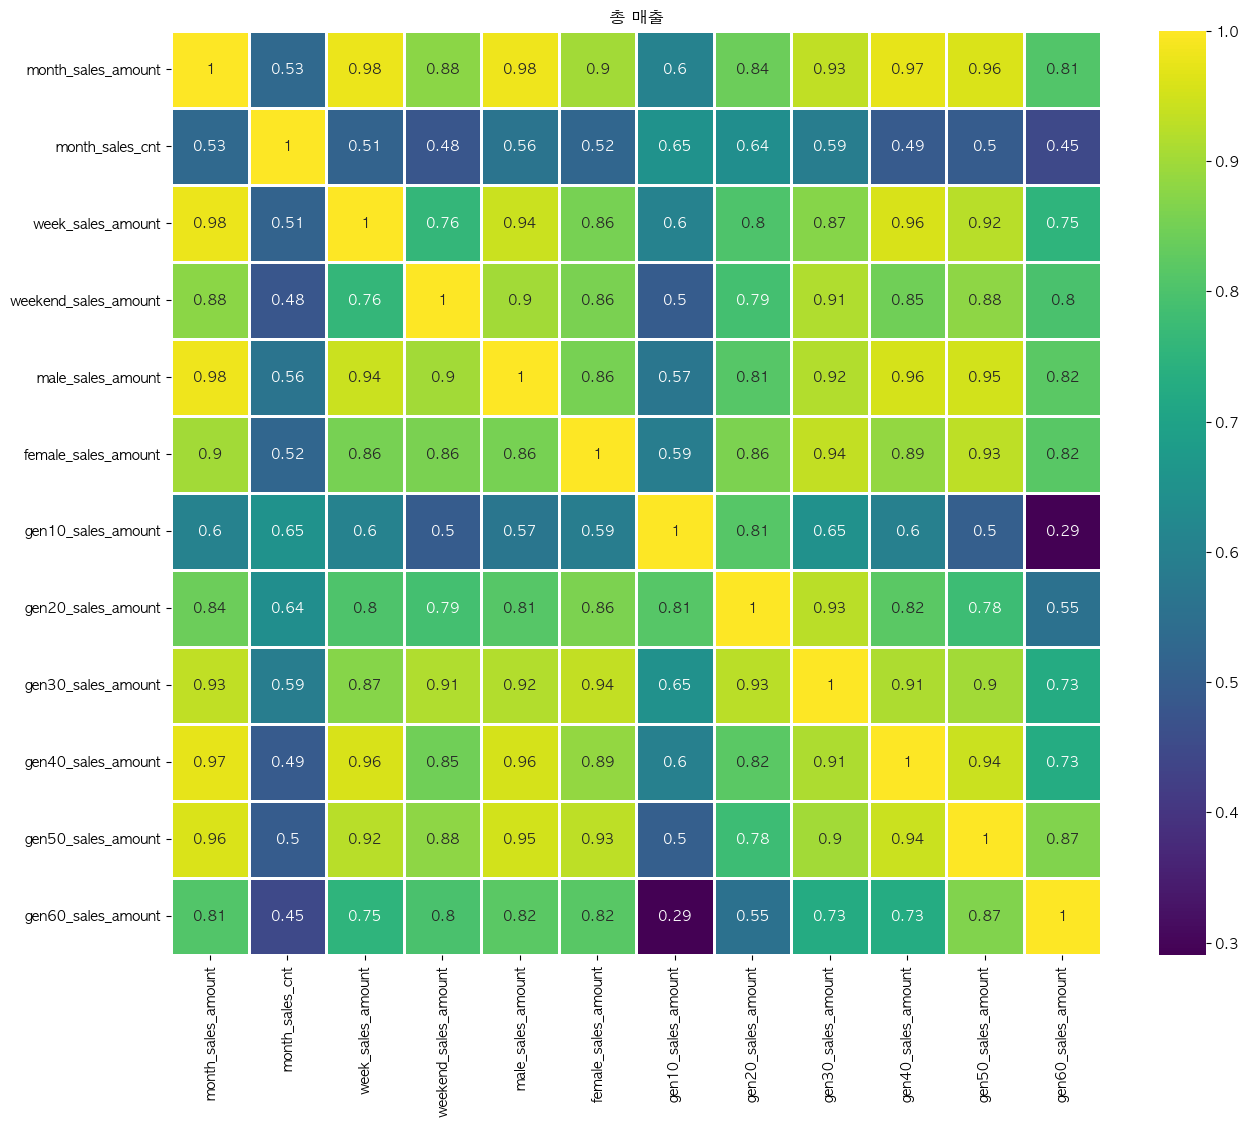

In [135]:
plt.figure(figsize=(15,12))
sns.heatmap(
    sales.corr(), 
    annot = True, 
    cmap = 'viridis',
    linewidth = 1
).set(
    title = "총 매출"
)

### 소득 소비

In [39]:
sql = """
SELECT
  *
FROM
  `burnished-core-313703.restaurant_consumption.income_expense`
WHERE 
  year_quater_cd BETWEEN 20191 AND 20224
ORDER BY
  year_quater_cd
"""
incom = client.query(sql).to_dataframe()
# incom

In [68]:
income["total_expense"] = income["total_expense"]
income

,year_quater_cd,autono_cd,autono_nm,month_avg_incom,income_cd,total_expense,grocery_total_expense,closho_total_expense,dailynec_total_expense,medicla_total_expense,trans_total_expense,edu_total_expense,entertain_total_expense,leisure_total_expense,etc_total_expense,food_total_expense
0,20231,11545,금천구,2632285,6,723.81528,16391004000,15296799000,1227870000,8525016000,3703454000,1510718000,1876521000,8290313000,2043012000,13516821000
1,20191,11545,금천구,2760087,6,1182.36694,11047828000,20155833000,57883048000,6075426000,2759146000,1551588000,1872844000,4312535000,1575074000,11003372000
2,20192,11545,금천구,2760087,6,1212.2595,12022226000,20497473000,57164479000,6726441000,3181799000,1425613000,2035507000,4888490000,1702004000,11581918000
3,20193,11545,금천구,2760087,6,1045.92838,13011898000,17575418000,41464092000,6948247000,3425845000,1573793000,2042689000,4799541000,1703073000,12048242000
4,20194,11545,금천구,2632285,6,1101.27925,11917185000,25105613000,37912934000,8963931000,3325026000,1730333000,1979339000,4962691000,1872424000,12358449000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,20221,11680,강남구,4943841,9,23362.92738,36917710000,25205260000,9928580000,151787801000,26501903000,28622019000,6613096000,1107184900000,878211630000,65319839000
446,20222,11680,강남구,4943841,9,25142.32842,41023896000,37236809000,10412783000,137717096000,31679223000,31206345000,12253585000,1218535191000,906533025000,87634889000
447,20223,11680,강남구,4943841,9,26676.13821,42323846000,34635475000,9470704000,133218984000,32395654000,41253858000,12193111000,1331330887000,942702525000,88088777000
448,20224,11680,강남구,4943841,9,26825.96068,43032309000,35642400000,9200405000,134393742000,32966794000,34699891000,11957574000,1361139144000,928074251000,91489558000


[Text(0.5, 1.0, '연도별 월평균 총 소득')]

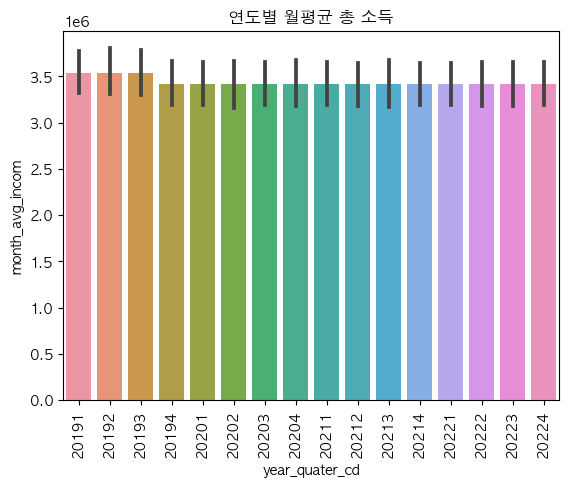

In [138]:
plt.xticks(rotation=90)
sns.barplot(
    data = incom,
    x = "year_quater_cd",
    y = "month_avg_incom",
).set(
    title = "연도별 월평균 총 소득"
)

# >> 월 평균 총 소득이 일정하게 나옴 -> 데이터에 이상이 있다고 판단
# >> 소득/소비 데이터는 사용하지 않는 것이 좋을 듯 함

[Text(0, 0, '20191'),
 Text(1, 0, '20192'),
 Text(2, 0, '20193'),
 Text(3, 0, '20194'),
 Text(4, 0, '20201'),
 Text(5, 0, '20202'),
 Text(6, 0, '20203'),
 Text(7, 0, '20204'),
 Text(8, 0, '20211'),
 Text(9, 0, '20212'),
 Text(10, 0, '20213'),
 Text(11, 0, '20214'),
 Text(12, 0, '20221'),
 Text(13, 0, '20222'),
 Text(14, 0, '20223'),
 Text(15, 0, '20224')]

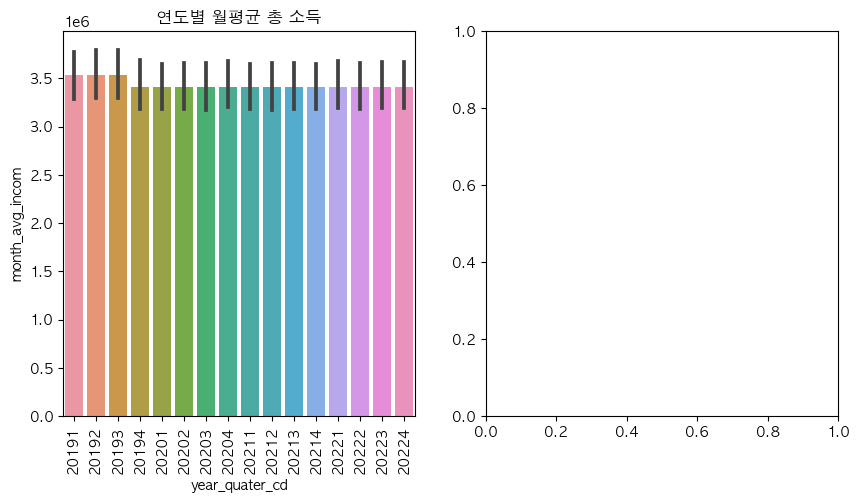

In [136]:
fig, ax = plt.subplots(ncols=2, nrows=1,  figsize=(10,5))

# 총 매출
sns.barplot(
    data = incom,
    x = "year_quater_cd",
    y = "month_avg_incom",
    ax = ax[0]
).set(
    title = "연도별 월평균 총 소득"
)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
# 총 매출 건수
# plt.xticks(rotation=90)
# sns.barplot(
#     data = sales,
#     x = "year_quater_cd",
#     y = "total_expense",
#     ax = ax[1]
# ).set(
#     title = "연도별 총 소비"
# )
# ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)




### 유동인구

In [157]:
sql = """
SELECT
  *
FROM
  `burnished-core-313703.restaurant_consumption.pop_by_road`
WHERE
  year_quater_cd BETWEEN 20191 AND 20224
ORDER BY
  year_quater_cd
"""
population = client.query(sql).to_dataframe()
population

,year_quater_cd,autono_cd,autono_nm,total_floating_pop,male_floating_pop,female_floating_pop,gen10_floating_pop,gen20_floating_pop,gen30_floating_pop,gen40_floating_pop,gen50_floating_pop,gen60_floating_pop,Mon_floating_pop,Tue_floating_pop,Wed_floating_pop,Thur_floating_pop,Fri_floating_pop,Sat_floating_pop,Sun_floating_pop
0,20191,11530,구로구,82988135,40034627,42953506,11717510,10642666,13582449,13609430,12851678,20584401,11810367,11793117,11792188,11745449,11726961,11870170,12249882
1,20191,11545,금천구,39866580,19527604,20338978,4837492,5516945,6624985,6267026,6704885,9915249,5695190,5694903,5676054,5649366,5651434,5704858,5794778
2,20191,11290,성북구,127926756,58736958,69189799,22049933,20306203,16889915,19048193,17977731,31654783,18104844,18099477,18122319,18132026,18090584,18529247,18848259
3,20191,11560,영등포구,113880582,55432558,58448023,13828575,16821290,19943412,18349018,17730368,27207918,16255722,16237151,16320662,16396043,16442611,16121121,16107271
4,20191,11305,강북구,105252544,48154372,57098172,14895102,14080285,13389190,15606484,16548731,30732751,14873596,14924309,14817027,14740748,14788366,15371596,15736902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,20224,11215,광진구,92150893,42824062,49326831,13440354,17952953,15499918,13947363,13284464,18025840,13155910,13031129,13032235,13012728,13047405,13367204,13504280
396,20224,11740,강동구,107789373,50405496,57383877,18269134,12615814,16754767,17640624,16271665,26237369,15438948,15277408,15274745,15200813,15221885,15525694,15849880
397,20224,11230,동대문구,106753455,50512630,56240825,13932318,22815692,15356516,15326646,14779850,24542432,15308054,15310500,15320394,15285338,15162196,15143494,15223478
398,20224,11500,강서구,114441017,53694232,60746785,18351983,15677159,21034326,18892277,15307382,25177892,16416314,16217531,16228024,16171325,16168078,16449396,16790348


In [159]:
population = population.drop(population.iloc[:, 12:], axis=1)

In [160]:
population = population.drop(["year_quater_cd"], axis=1)
# population
population = population.drop(["autono_cd"], axis=1)
population = population.drop(["autono_nm"], axis=1)

In [161]:
population

,total_floating_pop,male_floating_pop,female_floating_pop,gen10_floating_pop,gen20_floating_pop,gen30_floating_pop,gen40_floating_pop,gen50_floating_pop,gen60_floating_pop
0,82988135,40034627,42953506,11717510,10642666,13582449,13609430,12851678,20584401
1,39866580,19527604,20338978,4837492,5516945,6624985,6267026,6704885,9915249
2,127926756,58736958,69189799,22049933,20306203,16889915,19048193,17977731,31654783
3,113880582,55432558,58448023,13828575,16821290,19943412,18349018,17730368,27207918
4,105252544,48154372,57098172,14895102,14080285,13389190,15606484,16548731,30732751
...,...,...,...,...,...,...,...,...,...
395,92150893,42824062,49326831,13440354,17952953,15499918,13947363,13284464,18025840
396,107789373,50405496,57383877,18269134,12615814,16754767,17640624,16271665,26237369
397,106753455,50512630,56240825,13932318,22815692,15356516,15326646,14779850,24542432
398,114441017,53694232,60746785,18351983,15677159,21034326,18892277,15307382,25177892


In [162]:
population.corr()

,total_floating_pop,male_floating_pop,female_floating_pop,gen10_floating_pop,gen20_floating_pop,gen30_floating_pop,gen40_floating_pop,gen50_floating_pop,gen60_floating_pop
total_floating_pop,1.000000,0.994784,0.995947,0.877867,0.840424,0.891334,0.945232,0.944361,0.842300
male_floating_pop,0.994784,1.000000,0.981579,0.843181,0.855970,0.915899,0.951840,0.930841,0.812728
female_floating_pop,0.995947,0.981579,1.000000,0.900857,0.819446,0.861963,0.931229,0.948113,0.861088
gen10_floating_pop,0.877867,0.843181,0.900857,1.000000,0.559578,0.665451,0.839867,0.871988,0.795610
gen20_floating_pop,0.840424,0.855970,0.819446,0.559578,1.000000,0.841567,0.756404,0.672398,0.584418
gen30_floating_pop,0.891334,0.915899,0.861963,0.665451,0.841567,1.000000,0.933711,0.753368,0.548223
gen40_floating_pop,0.945232,0.951840,0.931229,0.839867,0.756404,0.933711,1.000000,0.869438,0.670449
gen50_floating_pop,0.944361,0.930841,0.948113,0.871988,0.672398,0.753368,0.869438,1.000000,0.915855
gen60_floating_pop,0.842300,0.812728,0.861088,0.795610,0.584418,0.548223,0.670449,0.915855,1.000000


[Text(0.5, 1.0, '유동인구')]

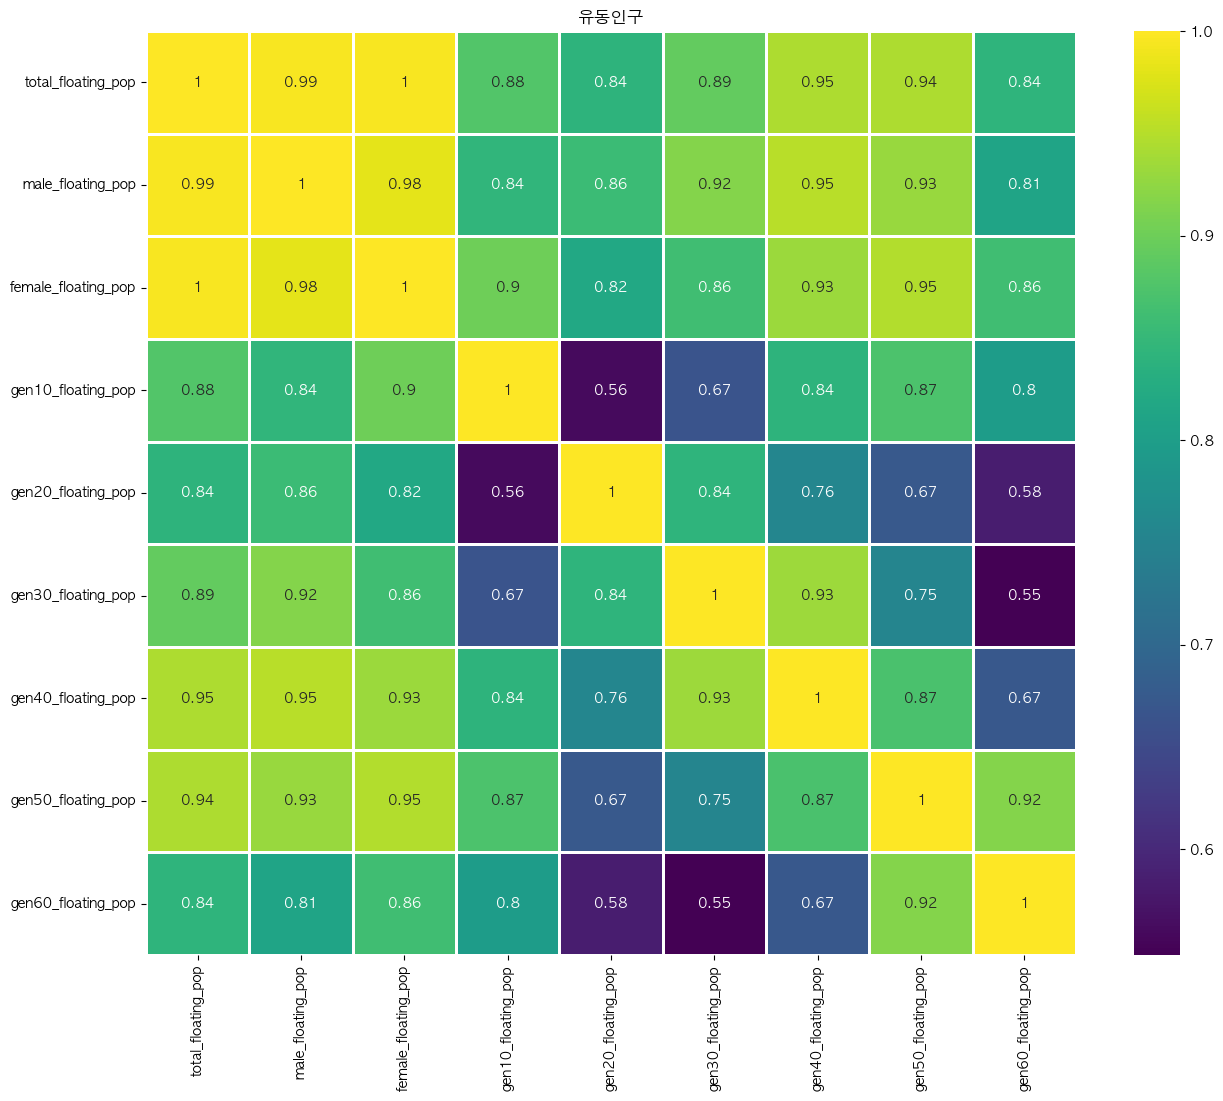

In [163]:
plt.figure(figsize=(15,12))
sns.heatmap(
    population.corr(), 
    annot = True, 
    cmap = 'viridis',
    linewidth = 1
).set(
    title = "유동인구"
)

[Text(0, 0, '구로구'),
 Text(1, 0, '금천구'),
 Text(2, 0, '성북구'),
 Text(3, 0, '영등포구'),
 Text(4, 0, '강북구'),
 Text(5, 0, '도봉구'),
 Text(6, 0, '동작구'),
 Text(7, 0, '노원구'),
 Text(8, 0, '관악구'),
 Text(9, 0, '종로구'),
 Text(10, 0, '은평구'),
 Text(11, 0, '서초구'),
 Text(12, 0, '중구'),
 Text(13, 0, '서대문구'),
 Text(14, 0, '강남구'),
 Text(15, 0, '용산구'),
 Text(16, 0, '마포구'),
 Text(17, 0, '송파구'),
 Text(18, 0, '성동구'),
 Text(19, 0, '양천구'),
 Text(20, 0, '광진구'),
 Text(21, 0, '강동구'),
 Text(22, 0, '동대문구'),
 Text(23, 0, '강서구'),
 Text(24, 0, '중랑구')]

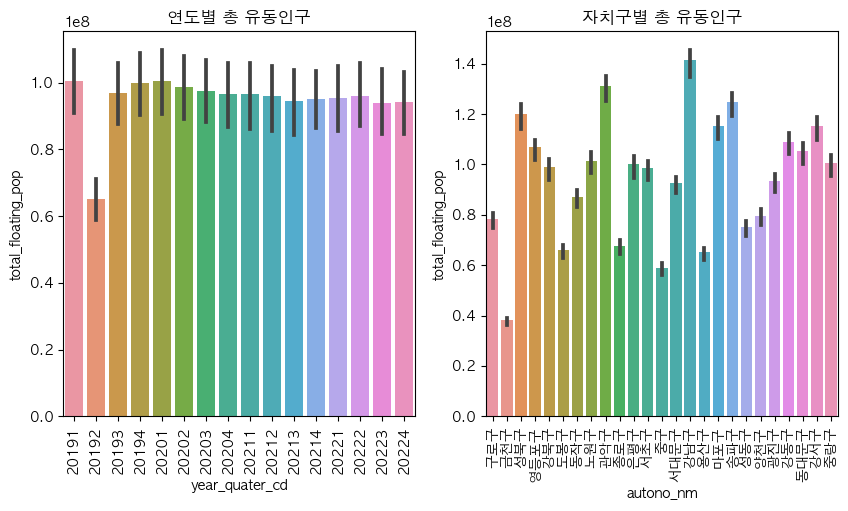

In [47]:
fig, ax = plt.subplots(ncols=2, nrows=1,  figsize=(10,5))

# 연도별 유동인구
sns.barplot(
    data = population,
    x = "year_quater_cd",
    y = "total_floating_pop",
    ax = ax[0]
).set(
    title = "연도별 총 유동인구"
)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
# 자치구별 유동인구
plt.xticks(rotation=90)
sns.barplot(
    data = population,
    x = "autono_nm",
    y = "total_floating_pop",
    ax = ax[1]
).set(
    title = "자치구별 총 유동인구"
)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)


### 점포

In [10]:
sql = """
SELECT
  *
FROM
  `burnished-core-313703.restaurant_consumption.store`
WHERE
  year_quater_cd BETWEEN 20191 AND 20224
ORDER BY
  year_quater_cd
"""
store = client.query(sql).to_dataframe()
store

,year_quater_cd,autono_cd,autono_nm,service_cd,service_nm,store_cnt,similar_store_cnt,open_rat,open_store_cnt,close_rat,close_store_cnt,franchise_cnt
0,20191,11530,구로구,CS100001,한식음식점,1918,2197,3,57,3,66,279
1,20191,11530,구로구,CS100002,중식음식점,349,361,6,22,5,19,12
2,20191,11530,구로구,CS100003,일식음식점,126,153,6,9,1,2,27
3,20191,11530,구로구,CS100004,양식음식점,96,118,3,3,4,5,22
4,20191,11530,구로구,CS100005,제과점,80,153,5,8,5,7,73
...,...,...,...,...,...,...,...,...,...,...,...,...
39953,20224,11260,중랑구,CS300039,모터사이클및부품,25,25,0,0,0,0,0
39954,20224,11260,중랑구,CS300040,재생용품 판매점,54,54,0,0,0,0,0
39955,20224,11260,중랑구,CS300041,예술품,19,19,16,3,0,0,0
39956,20224,11260,중랑구,CS300042,주유소,30,30,0,0,0,0,0


[Text(0, 0, '20191'),
 Text(1, 0, '20192'),
 Text(2, 0, '20193'),
 Text(3, 0, '20194'),
 Text(4, 0, '20201'),
 Text(5, 0, '20202'),
 Text(6, 0, '20203'),
 Text(7, 0, '20204'),
 Text(8, 0, '20211'),
 Text(9, 0, '20212'),
 Text(10, 0, '20213'),
 Text(11, 0, '20214'),
 Text(12, 0, '20221'),
 Text(13, 0, '20222'),
 Text(14, 0, '20223'),
 Text(15, 0, '20224')]

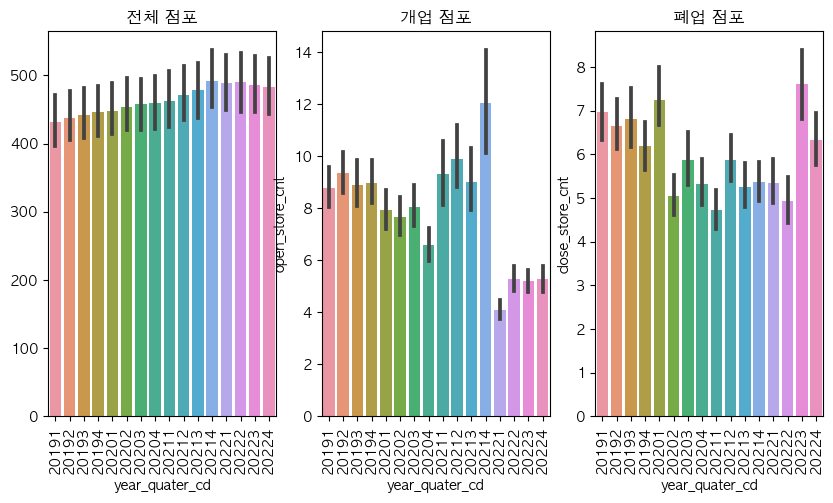

In [11]:
fig, ax = plt.subplots(ncols=3, nrows=1,  figsize=(10,5))

# 총 점포
sns.barplot(
    data = store,
    x = "year_quater_cd",
    y = store['store_cnt'] + store['similar_store_cnt'],
    ax = ax[0]
).set(
    title = "전체 점포"
)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
# 개업 점포
plt.xticks(rotation=90)
sns.barplot(
    data = store,
    x = "year_quater_cd",
    y = "open_store_cnt",
    ax = ax[1]
).set(
    title = "개업 점포"
)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)
# 폐업 점포
plt.xticks(rotation=90)
sns.barplot(
    data = store,
    x = "year_quater_cd",
    y = "close_store_cnt",
    ax = ax[2]
).set(
    title = "폐업 점포"
)
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=90)

In [13]:
store = store.drop(["year_quater_cd"], axis=1)
store = store.drop(["autono_cd"], axis=1)
store = store.drop(["autono_nm"], axis=1)
store = store.drop(["service_cd"], axis=1)
store = store.drop(["service_nm"], axis=1)
store = store.drop(["open_rat"], axis=1)
store = store.drop(["close_rat"], axis=1)

In [14]:
store.corr()

,store_cnt,similar_store_cnt,open_store_cnt,close_store_cnt,franchise_cnt
store_cnt,1.000000,0.993387,0.684464,0.842532,0.240359
similar_store_cnt,0.993387,1.000000,0.698346,0.869014,0.350219
open_store_cnt,0.684464,0.698346,1.000000,0.569423,0.320146
close_store_cnt,0.842532,0.869014,0.569423,1.000000,0.473505
franchise_cnt,0.240359,0.350219,0.320146,0.473505,1.000000


[Text(0.5, 1.0, '점포 수')]

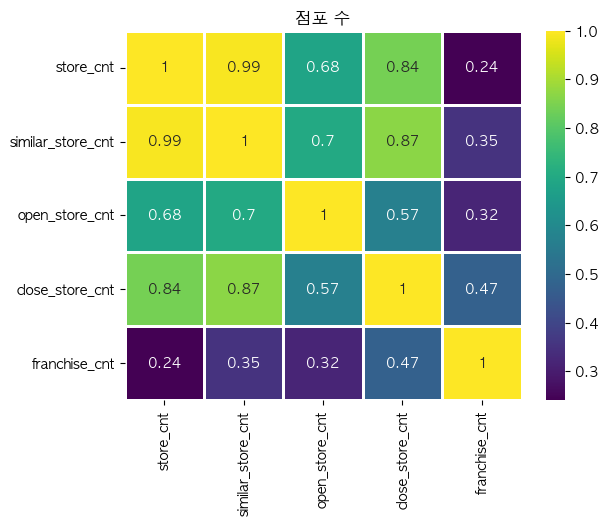

In [15]:
sns.heatmap(
    store.corr(), 
    annot = True, 
    cmap = 'viridis',
    linewidth = 1
).set(
    title = "점포 수"
)

# 개/폐업

In [52]:
# 연도별 총 점포 수

sql = """
SELECT
  year_quater_cd,
  SUM(store_cnt+similar_store_cnt) AS store_cnt
FROM
  `burnished-core-313703.restaurant_consumption.store`
WHERE
  (service_nm LIKE "%점" OR service_nm LIKE "커피%")
  AND service_nm NOT IN("편의점", "철물점", "%한복%", "%생활%")
  AND year_quater_cd BETWEEN 20191 AND 20224
GROUP BY
  year_quater_cd
ORDER BY
  1
"""
store_year = client.query(sql).to_dataframe()
store_year

,year_quater_cd,store_cnt
0,20191,255365
1,20192,257849
2,20193,258580
3,20194,260710
4,20201,260075
5,20202,262191
6,20203,263615
7,20204,264671
8,20211,265923
9,20212,268578


[Text(0.5, 1.0, '연도별 음식업 총 점포 수')]

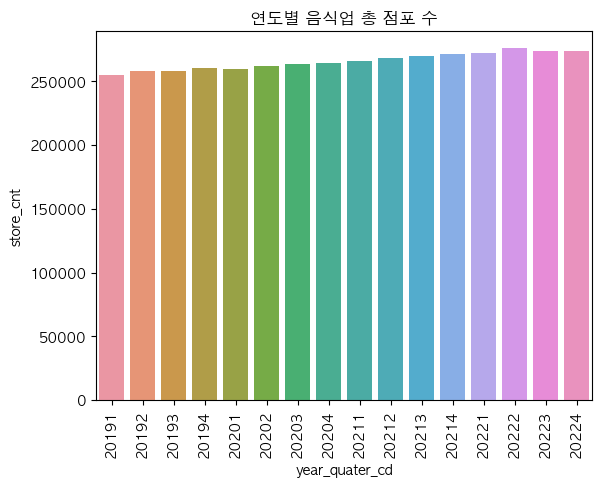

In [53]:
plt.xticks(rotation=90)
sns.barplot(
    data = store_year,
    x = "year_quater_cd",
    y = "store_cnt",
).set(
    title = "연도별 음식업 총 점포 수"
)

In [84]:
# 연도별 개/폐업 점포 수
sql = """
SELECT
  year_quater_cd,
  SUM(open_store_cnt) AS open_store_cnt,
  SUM(close_store_cnt) AS close_store_cnt
FROM
  `burnished-core-313703.restaurant_consumption.store`
WHERE
  year_quater_cd BETWEEN 20191 AND 20224
GROUP BY
  year_quater_cd
ORDER BY
  year_quater_cd
"""
store_oc = client.query(sql).to_dataframe()
store_oc["close/open"] = round((store_oc['close_store_cnt'] / store_oc['open_store_cnt']), 3)
store_oc

,year_quater_cd,open_store_cnt,close_store_cnt,close/open
0,20191,21913,17397,0.794
1,20192,23371,16615,0.711
2,20193,22222,16965,0.763
3,20194,22358,15430,0.69
4,20201,19772,18075,0.914
5,20202,19149,12619,0.659
6,20203,20127,14665,0.729
7,20204,16408,13298,0.81
8,20211,23263,11798,0.507
9,20212,24709,14638,0.592


[Text(0.5, 1.0, '연도별 개업 점포 수')]

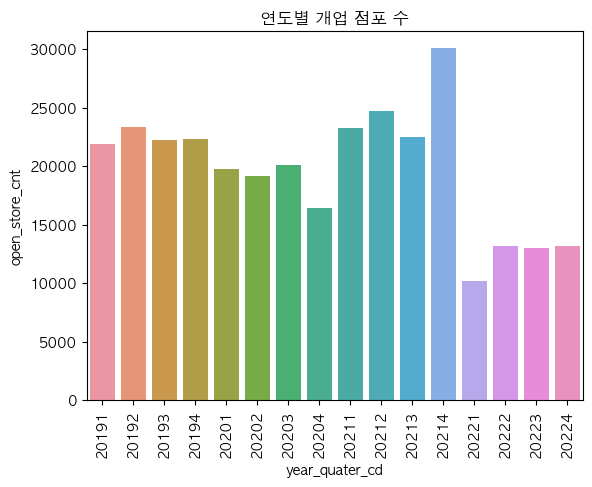

In [64]:
plt.xticks(rotation=90)
sns.barplot(
    data = store_oc,
    x = "year_quater_cd",
    y = "open_store_cnt",
).set(
    title = "연도별 개업 점포 수"
)

[Text(0.5, 1.0, '연도별 폐업 점포 수')]

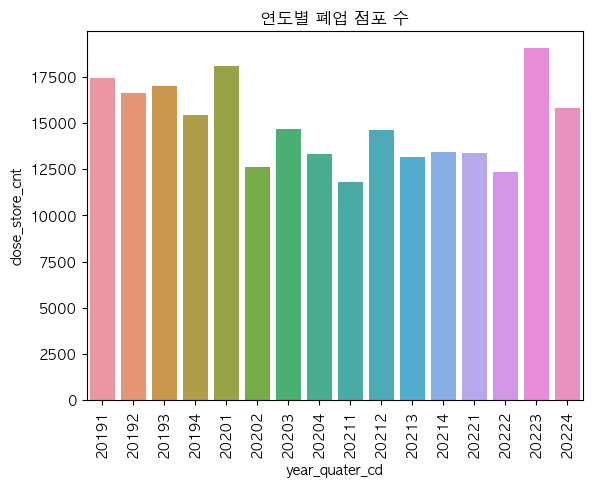

In [68]:
plt.xticks(rotation=90)
sns.barplot(
    data = store_oc,
    x = "year_quater_cd",
    y = "close_store_cnt",
).set(
    title = "연도별 폐업 점포 수"
)

[Text(0, 0, '20191'),
 Text(1, 0, '20192'),
 Text(2, 0, '20193'),
 Text(3, 0, '20194'),
 Text(4, 0, '20201'),
 Text(5, 0, '20202'),
 Text(6, 0, '20203'),
 Text(7, 0, '20204'),
 Text(8, 0, '20211'),
 Text(9, 0, '20212'),
 Text(10, 0, '20213'),
 Text(11, 0, '20214'),
 Text(12, 0, '20221'),
 Text(13, 0, '20222'),
 Text(14, 0, '20223'),
 Text(15, 0, '20224')]

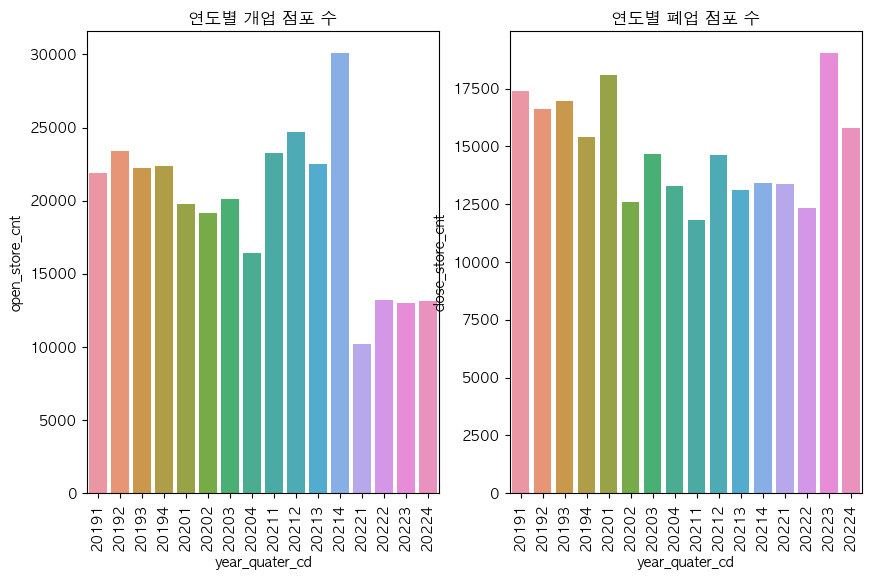

In [81]:
fig, ax = plt.subplots(ncols=2, nrows=1,  figsize=(10,6))

# 개업
# plt.xticks(rotation=90)
sns.barplot(
    data = store_oc,
    x = "year_quater_cd",
    y = "open_store_cnt",
    ax = ax[0]
).set(
    title = "연도별 개업 점포 수"
)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
# 폐업
plt.xticks(rotation=90)
sns.barplot(
    data = store_oc,
    x = "year_quater_cd",
    y = "close_store_cnt",
    ax = ax[1]
).set(
    title = "연도별 폐업 점포 수"
)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)

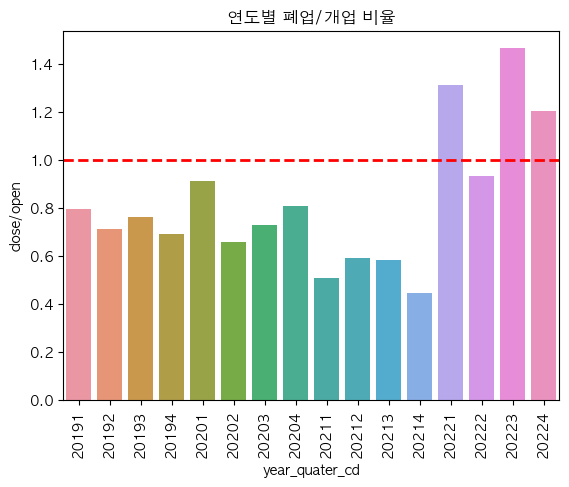

In [91]:
# 개업대비 폐업 비율
fig, ax = plt.subplots(ncols=1, nrows=1)
plt.xticks(rotation=90)
sns.barplot(
    data = store_oc,
    x = "year_quater_cd",
    y = "close/open",
).set(
    title = "연도별 폐업/개업 비율"
)
ax.axhline(y=1, color='red', linestyle='--', linewidth=2)


In [137]:
# 구별 총 점포 수

sql = """
SELECT
  autono_nm,
  SUM(store_cnt+similar_store_cnt) AS store_cnt
FROM
  `burnished-core-313703.restaurant_consumption.store`
WHERE
  (service_nm LIKE "%점" OR service_nm LIKE "커피%")
  AND service_nm NOT IN("편의점", "철물점", "%한복%", "%생활%")
GROUP BY
  autono_nm
ORDER BY
  1
"""
store_gu = client.query(sql).to_dataframe()
store_gu

,autono_nm,store_cnt
0,강남구,447835
1,강동구,174622
2,강북구,130287
3,강서구,223966
4,관악구,194712
5,광진구,173073
6,구로구,162141
7,금천구,118857
8,노원구,149495
9,도봉구,102008


[Text(0.5, 1.0, '구별 음식업 총 점포 수')]

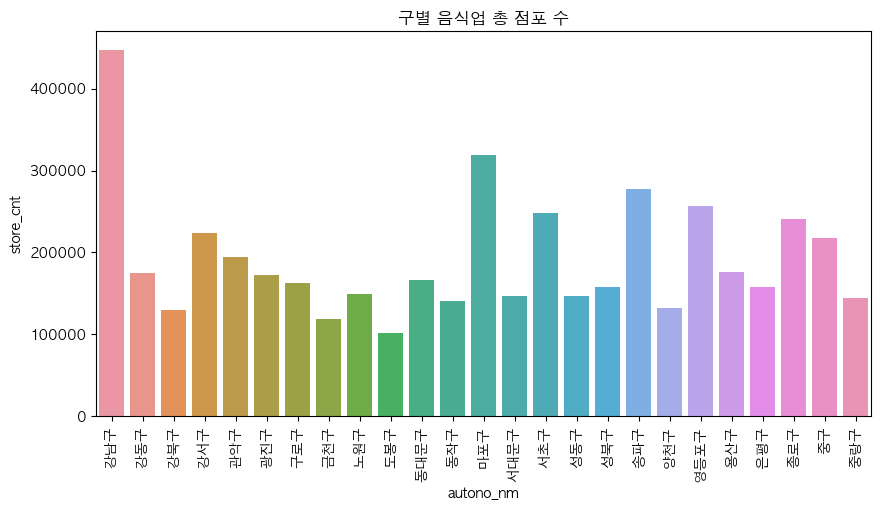

In [138]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.barplot(
    data = store_gu,
    x = "autono_nm",
    y = "store_cnt",
).set(
    title = "구별 음식업 총 점포 수"
)

In [92]:
# 구별 개/폐업 점포 수

sql = """
SELECT
  autono_nm,
  SUM(open_store_cnt) AS open_store_cnt,
  SUM(close_store_cnt) AS close_store_cnt
FROM
  `burnished-core-313703.restaurant_consumption.store`
WHERE
  (service_nm LIKE "%점"
    OR service_nm LIKE "커피%")
  AND service_nm NOT IN("편의점",
    "철물점",
    "%한복%",
    "%생활%")
GROUP BY
  autono_nm
ORDER BY
  1
"""
store_oc_gu = client.query(sql).to_dataframe()
store_oc_gu

,autono_nm,open_store_cnt,close_store_cnt
0,강남구,10586,9254
1,강동구,4360,4043
2,강북구,3191,2994
3,강서구,6583,5504
4,관악구,5021,4635
5,광진구,4194,3778
6,구로구,3711,3494
7,금천구,2990,2571
8,노원구,3510,3269
9,도봉구,2301,2167


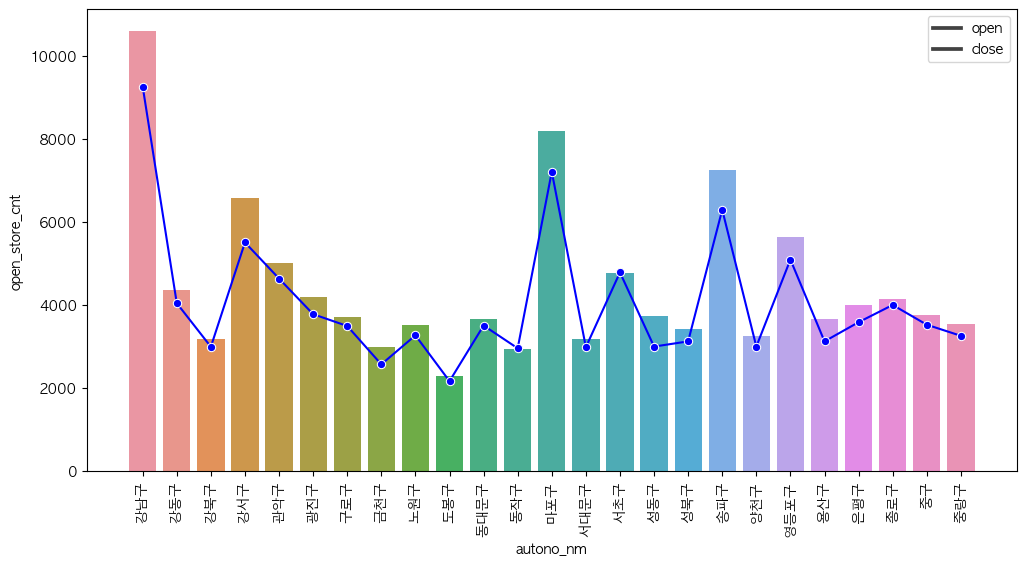

In [93]:
plt.figure(figsize=(12, 6))
plt.xticks(rotation=90)

# 개업
sns.barplot(
    data = store_oc_gu,
    x = "autono_nm",
    y = "open_store_cnt",
)
# 폐업
sns.lineplot(
    data = store_oc_gu,
    x = "autono_nm",
    y = "close_store_cnt",
    color = 'blue',
    marker='o'
)
plt.legend(['open','close'])
# plt.legend(loc=2, bbox_to_anchor=(1, 1))

In [194]:
# 개/폐업에 영향을 미치는 요인 분석
# >> 가설 1. 유동인구가 음식업 개/폐업에 영향을 줄 것이다

In [11]:
# 소득소비
sql = """
SELECT
  autono_nm,
  SUM(month_avg_incom) AS month_avg_incom,
  SUM(total_expense) AS total_expense,
  SUM(food_total_expense) AS food_total_expense
FROM
  `burnished-core-313703.restaurant_consumption.income_expense`
GROUP BY
  autono_nm
ORDER BY
  1
"""
income = client.query(sql).to_dataframe()
income

,autono_nm,month_avg_incom,total_expense,food_total_expense
0,강남구,89538039,39318227609000,1363835569000
1,강동구,59555469,2874516913000,359040487000
2,강북구,46153038,946321758000,256579629000
3,강서구,57162783,3545577086000,540637334000
4,관악구,50392536,1846980757000,458666272000
5,광진구,57879420,1470145283000,444690201000
6,구로구,54318855,18548434531000,329446756000
7,금천구,47764536,1734261716000,210806154000
8,노원구,57911766,1926640116000,402881641000
9,도봉구,50509479,778290999000,189834993000


In [13]:
# 개/폐업
sql = """
SELECT
  autono_nm,
  SUM(store_cnt+similar_store_cnt) AS store_cnt,
  SUM(open_store_cnt) AS open_store_cnt,
  SUM(close_store_cnt) AS close_store_cnt
FROM
  `burnished-core-313703.restaurant_consumption.store`
WHERE
  (service_nm LIKE "%점" OR service_nm LIKE "커피%")
  AND service_nm NOT IN("편의점", "철물점", "%한복%", "%생활%")
GROUP BY
  autono_nm
ORDER BY
  1
"""
store = client.query(sql).to_dataframe()
store

,autono_nm,store_cnt,open_store_cnt,close_store_cnt
0,강남구,447835,10586,9254
1,강동구,174622,4360,4043
2,강북구,130287,3191,2994
3,강서구,223966,6583,5504
4,관악구,194712,5021,4635
5,광진구,173073,4194,3778
6,구로구,162141,3711,3494
7,금천구,118857,2990,2571
8,노원구,149495,3510,3269
9,도봉구,102008,2301,2167


In [216]:
# 유동인구
sql = """
SELECT
  autono_nm,
  sum(total_floating_pop) as total_floating_pop,
  sum(male_floating_pop) as male_floating_pop,
  sum(female_floating_pop) as female_floating_pop,
  sum(gen10_floating_pop) as gen10_floating_pop,
  sum(gen20_floating_pop) as gen20_floating_pop,
  sum(gen30_floating_pop) as gen30_floating_pop,
  sum(gen40_floating_pop) as gen40_floating_pop,
  sum(gen50_floating_pop) as gen50_floating_pop,
  sum(gen60_floating_pop) as gen60_floating_pop
FROM
  `burnished-core-313703.restaurant_consumption.pop_by_road`
group by
  autono_nm
order by
  autono_nm
"""
pop = client.query(sql).to_dataframe()
pop

,autono_nm,total_floating_pop,male_floating_pop,female_floating_pop,gen10_floating_pop,gen20_floating_pop,gen30_floating_pop,gen40_floating_pop,gen50_floating_pop,gen60_floating_pop
0,강남구,2552528941,1242050219,1310478729,381575968,430436879,527629119,491445441,323006471,398435063
1,강동구,1960618858,916850472,1043768391,329610277,236899893,302411032,313909114,299528181,478260366
2,강북구,1778537972,815862635,962675330,250563772,243629480,227542701,264594335,284032677,508175016
3,강서구,2069028199,968331930,1100696271,334072240,285449018,372233383,330397124,281531299,465345142
4,관악구,2361337708,1156818061,1204519649,260069224,546938153,441124239,332521430,293517968,487166699
5,광진구,1679732213,783435801,896296408,247070007,315694515,280421624,254396614,243358775,338790679
6,구로구,1414728474,684057172,730671301,202265217,181391902,235295405,237821072,221277978,336676904
7,금천구,684739735,336590046,348149695,79364539,99704785,120101265,108421599,113954241,163193297
8,노원구,1814512443,836143007,978369428,337789771,251534750,216594220,273301534,279695381,455596785
9,도봉구,1183961167,546788969,637172197,184168723,145126880,154398062,173664826,189954054,336648613


In [199]:
x = store['open_store_cnt']
y = store['close_store_cnt']
stats.pearsonr(x,y)

# >> 개/폐업 사이에 강한 상관관계가 있음을 확인할 수 있다- (<- 완전 당연함)

PearsonRResult(statistic=0.9934813791918057, pvalue=3.3674389890511955e-23)

In [217]:
# 유동인구 ~ 개/폐업
pop_store = pd.concat([pop, store],axis=1, join='inner')
pop_store

,autono_nm,total_floating_pop,male_floating_pop,female_floating_pop,gen10_floating_pop,gen20_floating_pop,gen30_floating_pop,gen40_floating_pop,gen50_floating_pop,gen60_floating_pop,autono_nm,store_cnt,open_store_cnt,close_store_cnt
0,강남구,2552528941,1242050219,1310478729,381575968,430436879,527629119,491445441,323006471,398435063,강남구,447835,10586,9254
1,강동구,1960618858,916850472,1043768391,329610277,236899893,302411032,313909114,299528181,478260366,강동구,174622,4360,4043
2,강북구,1778537972,815862635,962675330,250563772,243629480,227542701,264594335,284032677,508175016,강북구,130287,3191,2994
3,강서구,2069028199,968331930,1100696271,334072240,285449018,372233383,330397124,281531299,465345142,강서구,223966,6583,5504
4,관악구,2361337708,1156818061,1204519649,260069224,546938153,441124239,332521430,293517968,487166699,관악구,194712,5021,4635
5,광진구,1679732213,783435801,896296408,247070007,315694515,280421624,254396614,243358775,338790679,광진구,173073,4194,3778
6,구로구,1414728474,684057172,730671301,202265217,181391902,235295405,237821072,221277978,336676904,구로구,162141,3711,3494
7,금천구,684739735,336590046,348149695,79364539,99704785,120101265,108421599,113954241,163193297,금천구,118857,2990,2571
8,노원구,1814512443,836143007,978369428,337789771,251534750,216594220,273301534,279695381,455596785,노원구,149495,3510,3269
9,도봉구,1183961167,546788969,637172197,184168723,145126880,154398062,173664826,189954054,336648613,도봉구,102008,2301,2167


In [218]:
pop_store = pop_store.drop(['autono_nm'], axis=1)
pop_store

,total_floating_pop,male_floating_pop,female_floating_pop,gen10_floating_pop,gen20_floating_pop,gen30_floating_pop,gen40_floating_pop,gen50_floating_pop,gen60_floating_pop,store_cnt,open_store_cnt,close_store_cnt
0,2552528941,1242050219,1310478729,381575968,430436879,527629119,491445441,323006471,398435063,447835,10586,9254
1,1960618858,916850472,1043768391,329610277,236899893,302411032,313909114,299528181,478260366,174622,4360,4043
2,1778537972,815862635,962675330,250563772,243629480,227542701,264594335,284032677,508175016,130287,3191,2994
3,2069028199,968331930,1100696271,334072240,285449018,372233383,330397124,281531299,465345142,223966,6583,5504
4,2361337708,1156818061,1204519649,260069224,546938153,441124239,332521430,293517968,487166699,194712,5021,4635
5,1679732213,783435801,896296408,247070007,315694515,280421624,254396614,243358775,338790679,173073,4194,3778
6,1414728474,684057172,730671301,202265217,181391902,235295405,237821072,221277978,336676904,162141,3711,3494
7,684739735,336590046,348149695,79364539,99704785,120101265,108421599,113954241,163193297,118857,2990,2571
8,1814512443,836143007,978369428,337789771,251534750,216594220,273301534,279695381,455596785,149495,3510,3269
9,1183961167,546788969,637172197,184168723,145126880,154398062,173664826,189954054,336648613,102008,2301,2167


In [219]:
pop_store.corr()

,total_floating_pop,male_floating_pop,female_floating_pop,gen10_floating_pop,gen20_floating_pop,gen30_floating_pop,gen40_floating_pop,gen50_floating_pop,gen60_floating_pop,store_cnt,open_store_cnt,close_store_cnt
total_floating_pop,1.000000,0.994332,0.995604,0.872392,0.830598,0.885214,0.941251,0.940780,0.826265,0.548586,0.663025,0.679927
male_floating_pop,0.994332,1.000000,0.980005,0.835105,0.847718,0.912218,0.948263,0.924917,0.793066,0.592634,0.691313,0.711141
female_floating_pop,0.995604,0.980005,1.000000,0.897049,0.807718,0.853114,0.926236,0.945921,0.847753,0.504631,0.631881,0.646045
gen10_floating_pop,0.872392,0.835105,0.897049,1.000000,0.534599,0.648185,0.831822,0.868617,0.788594,0.355106,0.504592,0.510590
gen20_floating_pop,0.830598,0.847718,0.807718,0.534599,1.000000,0.830021,0.739170,0.652575,0.552456,0.510654,0.569431,0.591957
gen30_floating_pop,0.885214,0.912218,0.853114,0.648185,0.830021,1.000000,0.930978,0.737059,0.512299,0.788594,0.863195,0.872894
gen40_floating_pop,0.941251,0.948263,0.926236,0.831822,0.739170,0.930978,1.000000,0.858430,0.642502,0.753384,0.818769,0.838188
gen50_floating_pop,0.940780,0.924917,0.945921,0.868617,0.652575,0.737059,0.858430,1.000000,0.914919,0.416110,0.524375,0.542870
gen60_floating_pop,0.826265,0.793066,0.847753,0.788594,0.552456,0.512299,0.642502,0.914919,1.000000,0.082355,0.229566,0.243287
store_cnt,0.548586,0.592634,0.504631,0.355106,0.510654,0.788594,0.753384,0.416110,0.082355,1.000000,0.944139,0.960841


[Text(0.5, 1.0, '유동인구 ~ 개/폐업')]

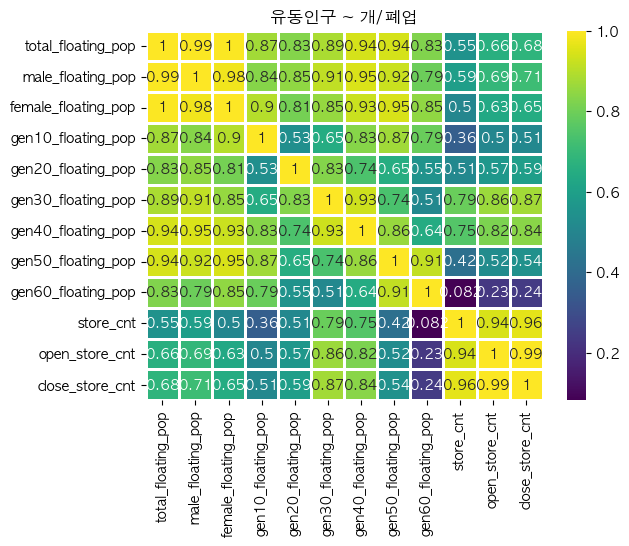

In [222]:
sns.heatmap(
    pop_store.corr(), 
    annot = True, 
    cmap = 'viridis',
    linewidth = 1
).set(
    title = "유동인구 ~ 개/폐업"
)

In [ ]:
# 음식점 개업(open_store_cnt)에 영향을 미치는 요인 (점포 수 제외)
# >> 30대, 40대 유동인구와 개업 점포 사이에 양의 상관관계가 있음을 확인할 수 있다

## 매출

In [141]:
sql = """
SELECT
  year_quater_cd,
  SUM(month_sales_amount) AS month_sales_amount
FROM
  `burnished-core-313703.restaurant_consumption.sales`
WHERE
  (service_nm LIKE "%점" OR service_nm LIKE "커피%")
  AND service_nm NOT IN("편의점", "철물점", "%한복%", "%생활%")
GROUP BY
  year_quater_cd
ORDER BY
  year_quater_cd
"""
sales = client.query(sql).to_dataframe()
sales

,year_quater_cd,month_sales_amount
0,20191,4351287475414
1,20192,4654125427532
2,20193,4739490536168
3,20194,5226758492711
4,20201,4348497985178
5,20202,4679395690661
6,20203,4546258227633
7,20204,4297763578511
8,20211,3985967369302
9,20212,4868463108096


In [142]:
sql = """
SELECT
  year_quater_cd,
  SUM(month_sales_amount) AS month_sales_amount
FROM
  `burnished-core-313703.restaurant_consumption.sales`
WHERE
  (service_nm LIKE "%점" OR service_nm LIKE "커피%")
  AND service_nm NOT IN("편의점", "철물점", "%한복%", "%생활%")
  AND year_quater_cd BETWEEN 20221 AND 20224
GROUP BY
  year_quater_cd
ORDER BY
  year_quater_cd
"""
sales_22 = client.query(sql).to_dataframe()
sales_22

,year_quater_cd,month_sales_amount
0,20221,4788593661065
1,20222,6761213996583
2,20223,6811061121506
3,20224,7338569555532


TypeError: 'str' object is not callable

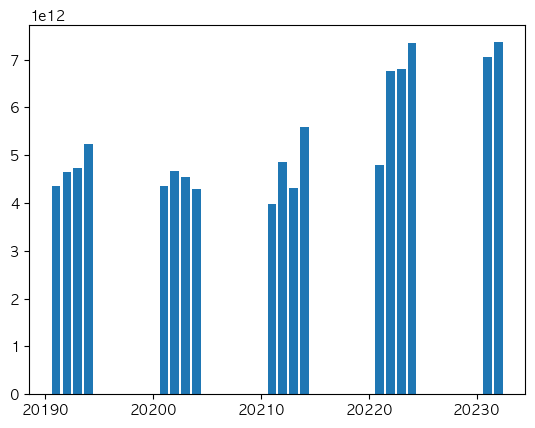

In [143]:
plt.bar(sales['year_quater_cd'], sales['month_sales_amount'])
plt.xlabel("year")
plt.ylabel("sales")
plt.title("총 매출")

<Axes: title={'center': 'Total Sales'}, xlabel='year_quater_cd', ylabel='month_sales_amount'>

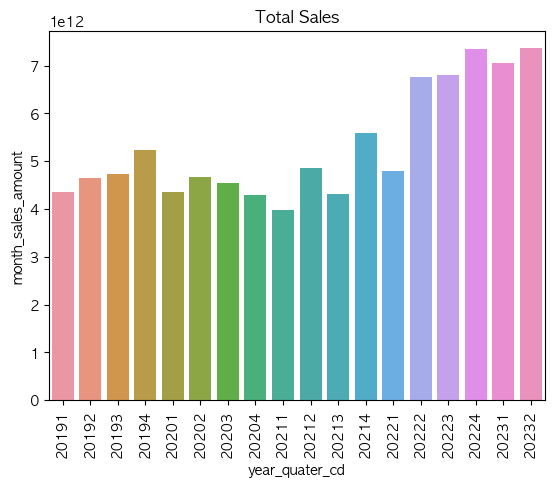

In [78]:
plt.xticks(rotation=90)
plt.title("Total Sales")
sns.barplot(
    data = sales,
    x = "year_quater_cd",
    y = "month_sales_amount"
)

NameError: name 'sales_19' is not defined

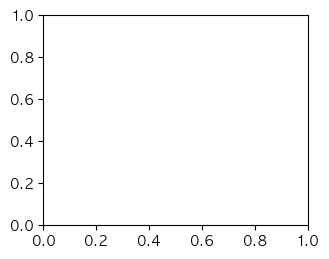

In [47]:
# 연도, 분기별 총 매출

plt.figure(figsize=(7.5,6))
plt.subplot(221)
sns.barplot(
    data = sales_19,
    x = "year_quater_cd",
    y = "month_sales_amount"
)
plt.subplot(222)
sns.barplot(
    data = sales_20,
    x = "year_quater_cd",
    y = "month_sales_amount"
)
plt.subplot(223)
sns.barplot(
    data = sales_21,
    x = "year_quater_cd",
    y = "month_sales_amount"
)
plt.subplot(224)
sns.barplot(
    data = sales_22,
    x = "year_quater_cd",
    y = "month_sales_amount"
)
axes.title("2019~2022 총 매출")

In [174]:
# >> 1분기보다 4분기에 매출이 확 오르는걸 볼 수 있음
# 왜?.?
# 가설 1. 구별 매출 변화가 총 매출에 영향을 미쳤을 것이다.
# 가설 2. 업종별 매출 변화가 총 매출에 영향을 미쳤을 것이다.

### 가설 1. 구별 매출 변화가 총 매출에 영향을 미쳤을 것이다.

In [45]:
sql = """
SELECT
  autono_nm,
  SUM(month_sales_amount) AS month_sales_amount
FROM
  `burnished-core-313703.restaurant_consumption.sales`
WHERE
  (service_nm LIKE "%점" OR service_nm LIKE "커피%")
  AND service_nm NOT IN("편의점", "철물점", "%한복%", "%생활%")
  AND year_quater_cd BETWEEN 20221 and 20224
GROUP BY
  autono_nm
ORDER BY
  autono_nm
"""
sales_gu_22 = client.query(sql).to_dataframe()
sales_gu_22

,autono_nm,month_sales_amount
0,강남구,3757528868332
1,강동구,794711013716
2,강북구,538127606702
3,강서구,892295043310
4,관악구,835910955928
5,광진구,827090119411
6,구로구,697383281440
7,금천구,580664729427
8,노원구,703019352334
9,도봉구,356041107940


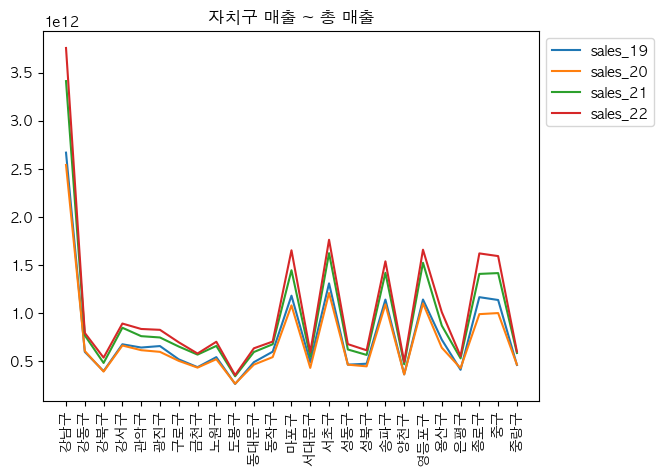

In [46]:
# plt.figure(figsize=(10,8))
plt.xticks(rotation=90)

plt.plot(sales_gu_19['autono_nm'], sales_gu_19['month_sales_amount'], label="sales_19")
plt.plot(sales_gu_19['autono_nm'], sales_gu_20['month_sales_amount'], label="sales_20")
plt.plot(sales_gu_19['autono_nm'], sales_gu_21['month_sales_amount'], label="sales_21")
plt.plot(sales_gu_19['autono_nm'], sales_gu_22['month_sales_amount'], label="sales_22")
plt.legend(loc=2, bbox_to_anchor=(1, 1))
# plt.xlabel('자치구')
# plt.ylabel('총 매출')
plt.title('자치구 매출 ~ 총 매출')
plt.show()

In [ ]:
# >> 1, 4분기 총 매출 변화가 자치구별 총 매출에 영향을 받지 않는 것으로 보임
# >> 가설 1 기각

### 가설 2. 업종별 매출 변화가 총 매출에 영향을 미쳤을 것이다.

In [171]:
sql = """
SELECT
  service_nm,
  SUM(month_sales_amount) AS month_sales_amount
  
FROM
  `burnished-core-313703.restaurant_consumption.sales`
WHERE
  (service_nm LIKE "%점" OR service_nm LIKE "커피%")
  AND service_nm NOT IN("편의점", "철물점", "%한복%", "%생활%")
  AND year_quater_cd BETWEEN 20221 and 20224
GROUP BY
  service_nm
ORDER BY
  service_nm
"""
sales_store_22 = client.query(sql).to_dataframe()
sales_store_22

,service_nm,month_sales_amount
0,분식전문점,1274286005498
1,양식음식점,1406744195325
2,일식음식점,1176265330098
3,제과점,1060291304105
4,중식음식점,1028379815661
5,치킨전문점,452881101263
6,커피-음료,2699960042275
7,패스트푸드점,638611298203
8,한식음식점,14157238186161
9,호프-간이주점,1804781056097


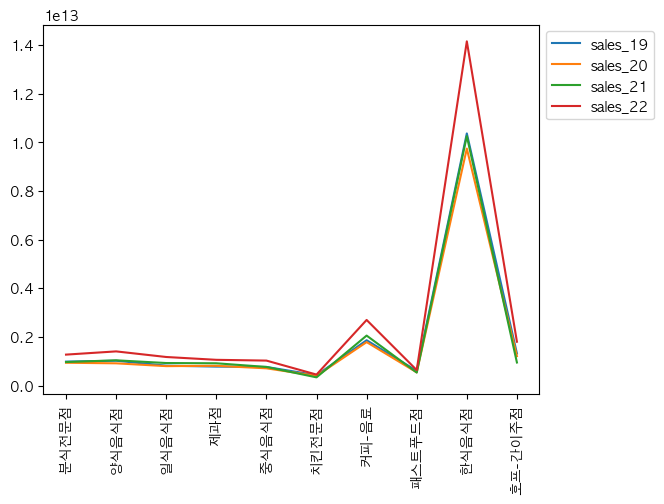

In [173]:
plt.xticks(rotation=90)
plt.plot(sales_store_19['service_nm'], sales_store_19['month_sales_amount'], label="sales_19")
plt.plot(sales_store_20['service_nm'], sales_store_20['month_sales_amount'], label="sales_20")
plt.plot(sales_store_21['service_nm'], sales_store_21['month_sales_amount'], label="sales_21")
plt.plot(sales_store_22['service_nm'], sales_store_22['month_sales_amount'], label="sales_22")

plt.legend(loc=2, bbox_to_anchor=(1, 1))

In [ ]:
# >> 1, 4분기 총 매출 변화가 업종별 총 매출에 영향을 받는 것으로 보임
# >> 가설 2 채택

In [ ]:
# >> 그렇다면, 업종별 매출에 영향을 끼치는 요인을 알아보면 

## 자치구별 음식업종 비율

In [5]:
# 구별 전체 음식점 수
sql = """
SELECT
  autono_nm,
  SUM(store_cnt+similar_store_cnt) as total_cnt
FROM
  `burnished-core-313703.restaurant_consumption.store`
WHERE
  (service_nm LIKE "%점" OR service_nm LIKE "커피%")
  AND service_nm NOT IN("편의점", "철물점", "한복점", "재생용품 판매점")
GROUP BY
  autono_nm
ORDER BY
  autono_nm
"""
store_all = client.query(sql).to_dataframe()
store_all

,autono_nm,total_cnt
0,강남구,443743
1,강동구,172510
2,강북구,129169
3,강서구,220892
4,관악구,192688
5,광진구,171849
6,구로구,158939
7,금천구,116609
8,노원구,147635
9,도봉구,100314


In [7]:
store_total_cnt = list(store_all["total_cnt"])
store_total_cnt

[443743,
 172510,
 129169,
 220892,
 192688,
 171849,
 158939,
 116609,
 147635,
 100314,
 163667,
 140035,
 316324,
 145990,
 245401,
 144552,
 154980,
 274921,
 130356,
 252847,
 175776,
 155665,
 231860,
 215230,
 141719]

In [8]:
# 강남구 음식업별 점포 수
sql = """
SELECT
  service_nm,
  SUM(store_cnt+similar_store_cnt) as total_cnt
FROM
  `burnished-core-313703.restaurant_consumption.store`
WHERE
  (service_nm LIKE "%점" OR service_nm LIKE "커피%")
  AND service_nm NOT IN("편의점", "철물점", "한복점", "재생용품 판매점")
  and autono_nm like '%강남%'
GROUP BY
  service_nm
ORDER BY
  service_nm
"""
store_gangnam = client.query(sql).to_dataframe()

# 업종 점포 수 / (자치구별)전체 업종 수
store_gangnam["total_rat"] = round(store_gangnam["total_cnt"] / store_total_cnt[0], 3)
store_gangnam

,service_nm,total_cnt,total_rat
0,분식전문점,40349,0.091
1,양식음식점,47372,0.107
2,일식음식점,30760,0.069
3,제과점,15523,0.035
4,중식음식점,15945,0.036
5,치킨전문점,8667,0.02
6,커피-음료,69484,0.157
7,패스트푸드점,16162,0.036
8,한식음식점,174925,0.394
9,호프-간이주점,24556,0.055


## 가설 설정

### 가설1. 유동인구와 개업점포 사이에 상관관계가 있다

In [93]:
sql = """
SELECT
  year_quater_cd,
  SUM(open_store_cnt) AS open_store_cnt
FROM
  `burnished-core-313703.restaurant_consumption.store`
WHERE
  year_quater_cd BETWEEN 20191 AND 20224
GROUP BY
  year_quater_cd
ORDER BY
  year_quater_cd
"""
store_open = client.query(sql).to_dataframe()
store_open

,year_quater_cd,open_store_cnt
0,20191,21913
1,20192,23371
2,20193,22222
3,20194,22358
4,20201,19772
5,20202,19149
6,20203,20127
7,20204,16408
8,20211,23263
9,20212,24709


In [92]:
sql = """
SELECT
  year_quater_cd,
  SUM(total_floating_pop) AS total_floating_pop
FROM
  `burnished-core-313703.restaurant_consumption.pop_by_road`
WHERE
  year_quater_cd BETWEEN 20191 AND 20224
GROUP BY
  year_quater_cd
ORDER BY
  year_quater_cd
"""
population = client.query(sql).to_dataframe()
population

,year_quater_cd,total_floating_pop
0,20191,2514146799
1,20192,1627946112
2,20193,2418836734
3,20194,2497952732
4,20201,2511744271
5,20202,2468277728
6,20203,2435932054
7,20204,2415724821
8,20211,2416938870
9,20212,2400733703


In [94]:
x = store_open["open_store_cnt"]
y = population["total_floating_pop"]
stats.pearsonr(x, y)

# >> 유의확률이 0.676으로 유의수준 0.05보다 크기 때문에 대립가설을 기각하고 귀무가설(유동인구와 개업 점포 수 사이에 관계가 없다)을 채택한다
# >> 총 유동인구와 개업 점포 사이에는 상관관계가 없는 것을 확인할 수 있다

PearsonRResult(statistic=-0.11320448950470684, pvalue=0.6763619400346997)

### 가설2. 유동인구와 매출 사이에 상관관계가 있다

In [95]:
population

,year_quater_cd,total_floating_pop
0,20191,2514146799
1,20192,1627946112
2,20193,2418836734
3,20194,2497952732
4,20201,2511744271
5,20202,2468277728
6,20203,2435932054
7,20204,2415724821
8,20211,2416938870
9,20212,2400733703


In [96]:
sql = """
SELECT
  year_quater_cd,
  SUM(month_sales_amount) AS month_sales_amount
FROM
  `burnished-core-313703.restaurant_consumption.sales`
WHERE
  year_quater_cd BETWEEN 20191 AND 20224
GROUP BY
  year_quater_cd
ORDER BY
  year_quater_cd
"""
sales = client.query(sql).to_dataframe()
sales

,year_quater_cd,month_sales_amount
0,20191,19105852067852
1,20192,19551667972381
2,20193,19711670392831
3,20194,21506945634723
4,20201,19105399060332
5,20202,20719829116721
6,20203,20458431950368
7,20204,20759356524812
8,20211,19865646997233
9,20212,21369136215695


In [97]:
x = sales["month_sales_amount"]
y = population["total_floating_pop"]
stats.pearsonr(x, y)

# >> 유의확률이 0.842로 유의수준 0.05보다 크기 때문에 대립가설을 기각하고 귀무가설(전체 유동인구와 총 매출 사이에 관계가 없다)을 채택한다
# >> 총 유동인구와 개업 점포 사이에는 상관관계가 없는 것을 확인할 수 있다

PearsonRResult(statistic=0.05435516102497945, pvalue=0.8415348643678318)

### 가설3. 특정 연령대 유동인구와 매출 사이에 관계가 있다

In [100]:
sql = """
SELECT
  year_quater_cd,
  SUM(total_floating_pop) AS total_floating_pop,
  SUM(gen10_floating_pop) AS gen10_floating_pop,
  SUM(gen20_floating_pop) AS gen20_floating_pop,
  SUM(gen30_floating_pop) AS gen30_floating_pop,
  SUM(gen40_floating_pop) AS gen40_floating_pop,
  SUM(gen50_floating_pop) AS gen50_floating_pop,
  SUM(gen60_floating_pop) AS gen60_floating_pop,
FROM
  `burnished-core-313703.restaurant_consumption.pop_by_road`
WHERE
  year_quater_cd BETWEEN 20191 AND 20224
GROUP BY
  year_quater_cd
ORDER BY
  year_quater_cd
"""
pop_age = client.query(sql).to_dataframe()
pop_age

,year_quater_cd,total_floating_pop,gen10_floating_pop,gen20_floating_pop,gen30_floating_pop,gen40_floating_pop,gen50_floating_pop,gen60_floating_pop
0,20191,2514146799,364500404,395000389,403271455,390968958,364727987,595677608
1,20192,1627946112,239628363,258403548,264277525,254576850,233353685,377706149
2,20193,2418836734,352094350,386241286,395881640,380309519,348137928,556172018
3,20194,2497952732,366078173,399383164,408763832,393651707,359761176,570314685
4,20201,2511744271,368724923,396526450,413048941,398537873,363495556,571410516
5,20202,2468277728,365629988,395299385,407291192,392820709,355085779,552150686
6,20203,2435932054,357916473,386923009,402780485,389714476,353167923,545429687
7,20204,2415724821,354907619,378481549,401225493,389330381,351920478,539859305
8,20211,2416938870,353884454,374062640,402866774,391105079,354124276,540895656
9,20212,2400733703,355155181,377668362,400650779,388372783,349764027,529122565


In [101]:
sales_popAge = pd.concat([sales,pop_age],axis=1, join='inner')
sales_popAge

,year_quater_cd,month_sales_amount,year_quater_cd,total_floating_pop,gen10_floating_pop,gen20_floating_pop,gen30_floating_pop,gen40_floating_pop,gen50_floating_pop,gen60_floating_pop
0,20191,19105852067852,20191,2514146799,364500404,395000389,403271455,390968958,364727987,595677608
1,20192,19551667972381,20192,1627946112,239628363,258403548,264277525,254576850,233353685,377706149
2,20193,19711670392831,20193,2418836734,352094350,386241286,395881640,380309519,348137928,556172018
3,20194,21506945634723,20194,2497952732,366078173,399383164,408763832,393651707,359761176,570314685
4,20201,19105399060332,20201,2511744271,368724923,396526450,413048941,398537873,363495556,571410516
5,20202,20719829116721,20202,2468277728,365629988,395299385,407291192,392820709,355085779,552150686
6,20203,20458431950368,20203,2435932054,357916473,386923009,402780485,389714476,353167923,545429687
7,20204,20759356524812,20204,2415724821,354907619,378481549,401225493,389330381,351920478,539859305
8,20211,19865646997233,20211,2416938870,353884454,374062640,402866774,391105079,354124276,540895656
9,20212,21369136215695,20212,2400733703,355155181,377668362,400650779,388372783,349764027,529122565


In [103]:
sales_popAge = sales_popAge.drop(["year_quater_cd"], axis=1)

In [104]:
sales_popAge

,month_sales_amount,total_floating_pop,gen10_floating_pop,gen20_floating_pop,gen30_floating_pop,gen40_floating_pop,gen50_floating_pop,gen60_floating_pop
0,19105852067852,2514146799,364500404,395000389,403271455,390968958,364727987,595677608
1,19551667972381,1627946112,239628363,258403548,264277525,254576850,233353685,377706149
2,19711670392831,2418836734,352094350,386241286,395881640,380309519,348137928,556172018
3,21506945634723,2497952732,366078173,399383164,408763832,393651707,359761176,570314685
4,19105399060332,2511744271,368724923,396526450,413048941,398537873,363495556,571410516
5,20719829116721,2468277728,365629988,395299385,407291192,392820709,355085779,552150686
6,20458431950368,2435932054,357916473,386923009,402780485,389714476,353167923,545429687
7,20759356524812,2415724821,354907619,378481549,401225493,389330381,351920478,539859305
8,19865646997233,2416938870,353884454,374062640,402866774,391105079,354124276,540895656
9,21369136215695,2400733703,355155181,377668362,400650779,388372783,349764027,529122565


[Text(0.5, 1.0, '연령대별 유동인구 ~ 총 매출')]

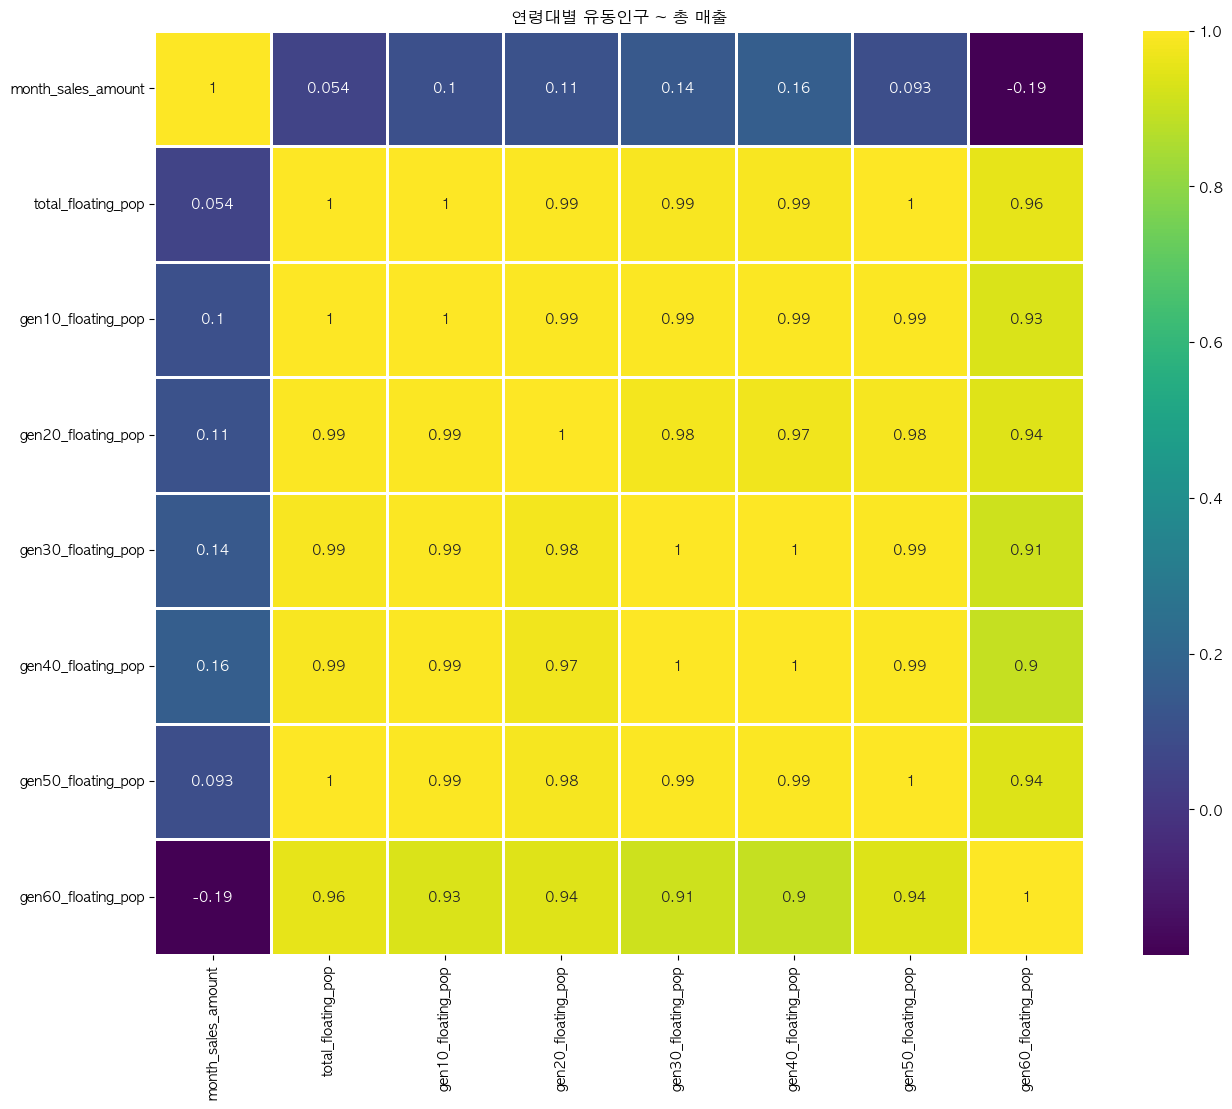

In [105]:
plt.figure(figsize=(15,12))
sns.heatmap(
    sales_popAge.corr(), 
    annot = True, 
    cmap = 'viridis',
    linewidth = 1
).set(
    title = "연령대별 유동인구 ~ 총 매출"
)

# >> 총 매출의 상관계수가 0.7 이상인 연령대 없음
# >> 특정 연령대와 총 매출 사이에는 관계가 없음을 알 수 있다